### Student Information
Name: 張文瑋

Student ID: 107062589

GitHub ID: mrwenwei

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

# Lab 1 take home part

In [1]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))



### ** >>> Exercise 2 (take home):** 

In [3]:
X[X['category_name']=='sci.med'].iloc[::5][0:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
29,From: spp@zabriskie.berkeley.edu (Steve Pope) ...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
66,From: paj@uk.co.gec-mrc (Paul Johnson) Subject...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med


In [4]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
result_with_series = X.append(dummy_series, ignore_index=True)
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]
X = X.append(dummy_dict, ignore_index=True)
X.dropna(inplace=True)

/Users/wenwei/.virtualenvs/DL/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


### ** >>> Exercise 5 (take home):** 

# Answer here
Because the contents of index 2,3,5 is not actually NULL, but a string.

### ** >>> Exercise 6 (take home):** 

In [5]:
X_tmp = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X_tmp['category'] = twenty_train.target
# add category label also
X_tmp['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X.equals(X_tmp) # Compare X with the original dataframe

True

In [6]:
print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


### ** >>> Exercise 8 (take home):** 

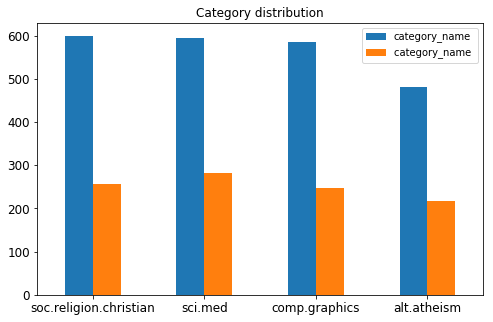

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

X_sample = X.sample(n=1000)
# Answer here
df = X.category_name.value_counts().rename('category_name').to_frame()\
               .join(X_sample.category_name.value_counts().rename('category_name ').to_frame())
df.plot(kind = 'bar', title = 'Category distribution', rot = 0, fontsize = 12, figsize = (8,5))

In [8]:
import nltk
# takes a like a minute or two to process
nltk.download('punkt')
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()

[nltk_data] Downloading package punkt to /Users/wenwei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### **>>> Exercise 10 (take home):**

In [9]:
import numpy as np
# Answer here
count_vect.get_feature_names()[(np.where(X_counts[4,0:100].toarray() == 1)[1][1])]

'01'

In [10]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()


### **>>> Exercise 11 (take home):** 

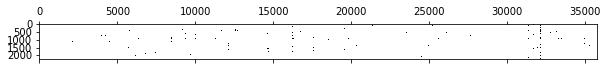

In [11]:
import seaborn as sns
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:]]
plot_z = X_counts[0:, 0:].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 10))
plt.spy(df_todraw)

### >>> Exercise 12 (take home):

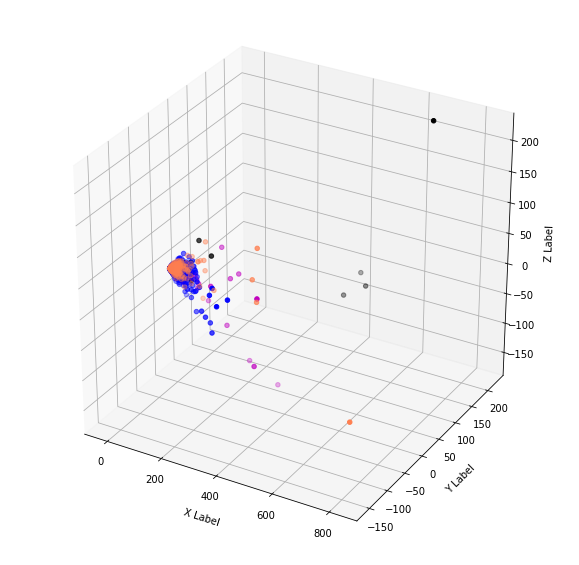

In [12]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
# Answer here
# plot
col = ['coral', 'blue', 'black', 'm']

from mpl_toolkits.mplot3d import Axes3D
X_reduced3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
fig = plt.figure(figsize=(10, 10))
plt3 = fig.add_subplot(1,1,1, projection='3d')


for c, category in zip(col, categories):
    xs = X_reduced3[X['category_name'] == category].T[0]
    ys = X_reduced3[X['category_name'] == category].T[1]
    zs = X_reduced3[X['category_name'] == category].T[2]
   
    plt3.scatter(xs, ys, zs, c = c, marker='o')

plt3.set_xlabel('\nX Label')
plt3.set_ylabel('\nY Label')
plt3.set_zlabel('\nZ Label')

plt.show()

In [13]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]


### >>> **Exercise 13 (take home):**


In [14]:
# Answer here
import plotly.plotly as py
import plotly
import helpers.text_analysis as ta
plotly.tools.set_credentials_file(username='wenwei', api_key='gly83g0VPxJZu3BtFa94')

py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))


/Users/wenwei/.virtualenvs/DL/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




The draw time for this plot will be slow for clients without much RAM.


/Users/wenwei/.virtualenvs/DL/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



### >>> **Exercise 14 (take home):** 

In [15]:
# Answer here
av = term_frequencies.mean()
std = np.std(term_frequencies)
feature_names = count_vect.get_feature_names()
term_frequencies_abmean=[]
new_feature = []
# Plot the top 5% terms
for i in range(len(term_frequencies)):
    if term_frequencies[i] > av + 2*std:
        term_frequencies_abmean.append(term_frequencies[i])
        new_feature.append(feature_names[i])
        
py.iplot(ta.plot_word_frequency([new_feature, term_frequencies_abmean], "Term Frequency Distribution"))


/Users/wenwei/.virtualenvs/DL/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




### >>> **Exercise 15 (take home):** 

In [16]:
# Answer here
mix = [(new_feature[i], term_frequencies_abmean[i]) for i in range(len(term_frequencies_abmean))]
sorted_names = [ new_feature for f, name in sorted(mix, reverse=True)]
sorted_feq = sorted(term_frequencies_abmean, reverse=True)

py.iplot(ta.plot_word_frequency([sorted_names[0], sorted_feq], "Term Frequency Distribution(Long tail)"))

/Users/wenwei/.virtualenvs/DL/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [18]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

### >>> **Exercise 16 (take home):**

In [19]:
# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
mlb.classes_
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]
# It work

,text,category,category_name,unigrams,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]","[0, 0, 1, 0]"


# SECOND PART

In [20]:
### Begin Assignment Here!
import pandas as pd
def format_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for d in docs:
        temp_d = " ".join(d.split("\n")).strip('\n\t')
        
        D.append([temp_d.split("\t")[0].rstrip(),temp_d.split("\t")[1].rstrip()])
    return D

f = open("imdb_labelled.txt",'r')
data1 = pd.DataFrame.from_records(format_rows(f.readlines()),columns = ['text','score'])
f = open("amazon_cells_labelled.txt",'r')
data2 = pd.DataFrame.from_records(format_rows(f.readlines()),columns = ['text','score'])
f = open("yelp_labelled.txt",'r')
data3 = pd.DataFrame.from_records(format_rows(f.readlines()),columns = ['text','score'])
f.close()

frames = [data1,data2,data3]
data = pd.concat(frames)
data

,text,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [21]:
X = data

In [22]:
# Check is there any null data
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            print(element)
            counter+=1
    return ("The amoung of missing records is: ", counter)
X.isnull().apply(lambda x: check_missing_values(x))

text     (The amoung of missing records is: , 0)
score    (The amoung of missing records is: , 0)
dtype: object

In [23]:
# Chaeck duplicated data
sum(X.duplicated())

18

In [24]:
# Drop duplicated data
X.drop_duplicates(keep=False, inplace=True) 
len(X)

2964

In [25]:
# Sampling
X_sample = X.sample(n=1000)
X_sample[0:5]

,text,score
34,Today the graphics are crap.,0
449,There's really nothing bad I can say about thi...,0
955,But then they came back cold.,0
679,The volume for the ringer is REAL good (you ha...,1
943,Not good by any stretch of the imagination.,0


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
categories = ['0','1']

0    1484
1    1480
Name: score, dtype: int64


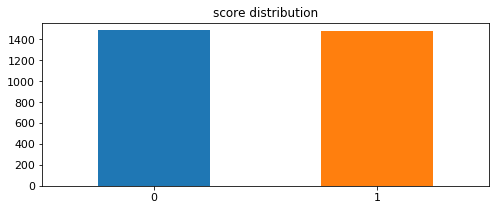

In [28]:
print(X.score.value_counts())

# plot barchart for X_sample
X.score.value_counts().plot(kind = 'bar',
                                    title = 'score distribution',        
                                    rot = 0, fontsize = 11, figsize = (8,3))

1    517
0    483
Name: score, dtype: int64


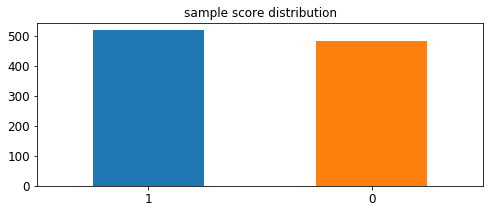

In [29]:
print(X_sample.score.value_counts())

# plot barchart for X_sample
X_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'sample score distribution',
                                           rot = 0, fontsize = 12, figsize = (8,3))

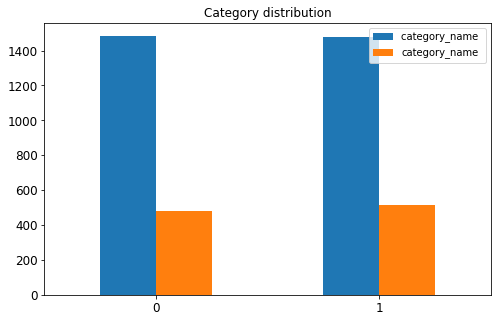

In [30]:
df = X.score.value_counts().rename('category_name ').to_frame()\
               .join(X_sample.score.value_counts().rename('category_name').to_frame())
df.plot(kind = 'bar', title = 'Category distribution', rot = 0, fontsize = 12, figsize = (8,5))

In [31]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/wenwei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

X['unigrams'] = X['text'].apply(lambda x: tokenize_text(x))
X[0:4]["unigrams"]

0    [A, very, ,, very, ,, very, slow-moving, ,, ai...
1    [Not, sure, who, was, more, lost, -, the, flat...
2    [Attempting, artiness, with, black, &, white, ...
3    [Very, little, music, or, anything, to, speak,...
Name: unigrams, dtype: object

In [33]:
X[0:4]

,text,score,unigrams
0,"A very, very, very slow-moving, aimless movie ...",0,"[A, very, ,, very, ,, very, slow-moving, ,, ai..."
1,Not sure who was more lost - the flat characte...,0,"[Not, sure, who, was, more, lost, -, the, flat..."
2,Attempting artiness with black & white and cle...,0,"[Attempting, artiness, with, black, &, white, ..."
3,Very little music or anything to speak of.,0,"[Very, little, music, or, anything, to, speak,..."


In [34]:
list(X[0:1]['unigrams'])

[['A',
  'very',
  ',',
  'very',
  ',',
  'very',
  'slow-moving',
  ',',
  'aimless',
  'movie',
  'about',
  'a',
  'distressed',
  ',',
  'drifting',
  'young',
  'man',
  '.']]

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [36]:
X_counts = count_vect.fit_transform(X.text)

In [37]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")

['hello', 'world']

In [38]:
analyze(X.iloc[0].text)

['very',
 'very',
 'very',
 'slow',
 'moving',
 'aimless',
 'movie',
 'about',
 'distressed',
 'drifting',
 'young',
 'man']

In [39]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [40]:
# We can check the shape of this matrix by:
X_counts.shape

(2964, 5153)

In [41]:
# we convert from sparse array to normal array
X_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [42]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [43]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [44]:
plot_z = X_counts[0:20, 0:20].toarray()
X_counts

<2964x5153 sparse matrix of type '<class 'numpy.int64'>'
	with 31448 stored elements in Compressed Sparse Row format>

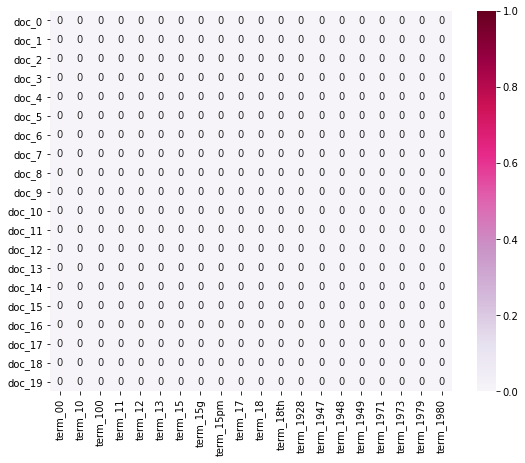

In [45]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

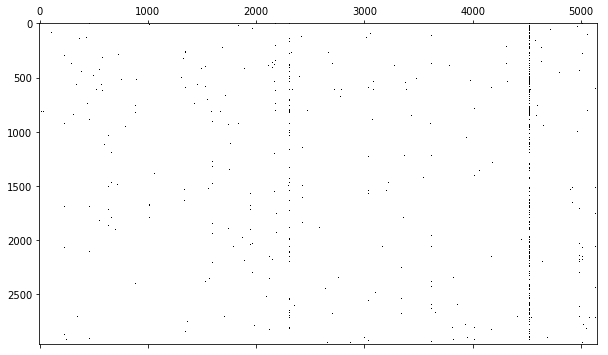

In [46]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:]]
plot_z = X_counts[0:, 0:].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 10))
plt.spy(df_todraw)

In [47]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
X_reduced.shape

(2964, 2)

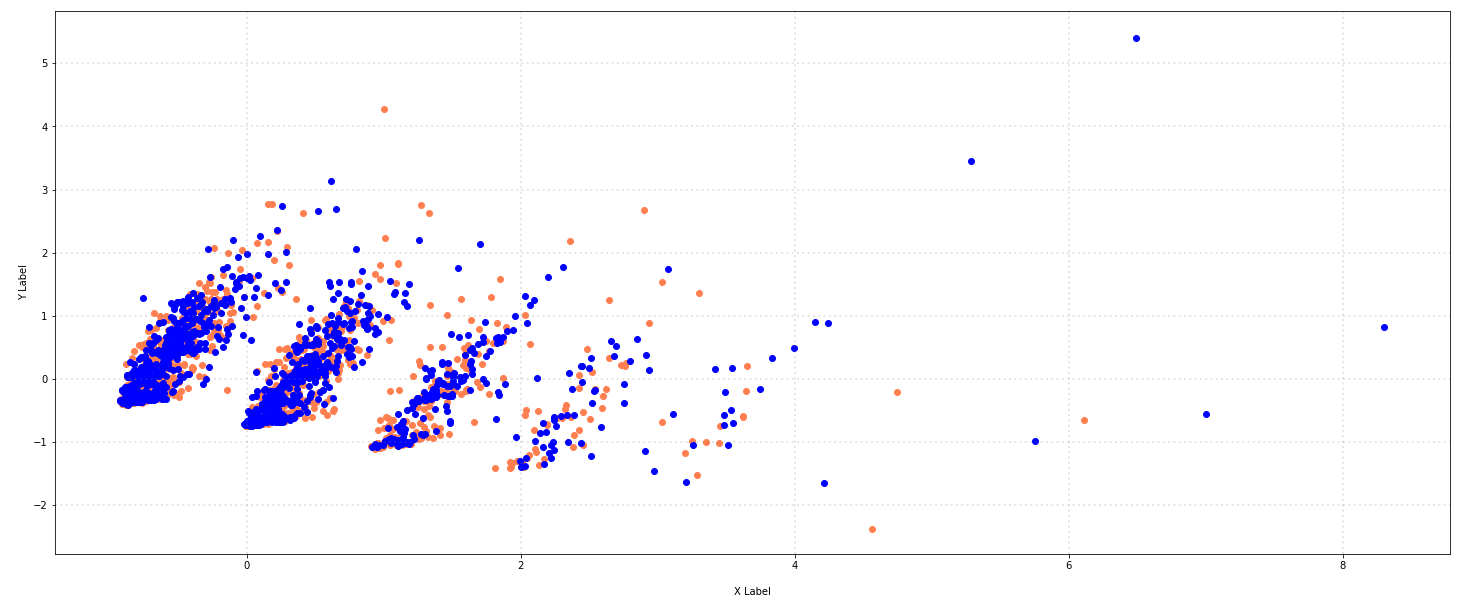

In [48]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['score'] == category].T[0]
    ys = X_reduced[X['score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

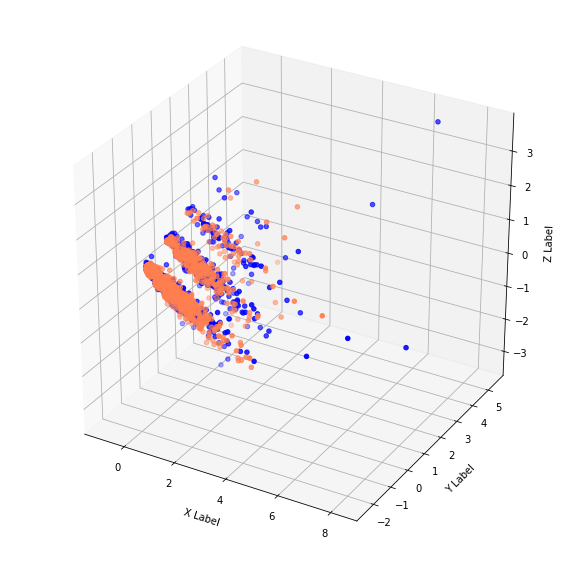

In [49]:
# 3d plot
from mpl_toolkits.mplot3d import Axes3D
X_reduced3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
fig = plt.figure(figsize=(10, 10))
plt3 = fig.add_subplot(1,1,1, projection='3d')


for c, category in zip(col, categories):
    xs = X_reduced3[X['score'] == category].T[0]
    ys = X_reduced3[X['score'] == category].T[1]
    zs = X_reduced3[X['score'] == category].T[2]
   
    plt3.scatter(xs, ys, zs, c = c, marker='o')

plt3.set_xlabel('\nX Label')
plt3.set_ylabel('\nY Label')
plt3.set_zlabel('\nZ Label')

plt.show()

In [50]:
import numpy as np
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0]

1

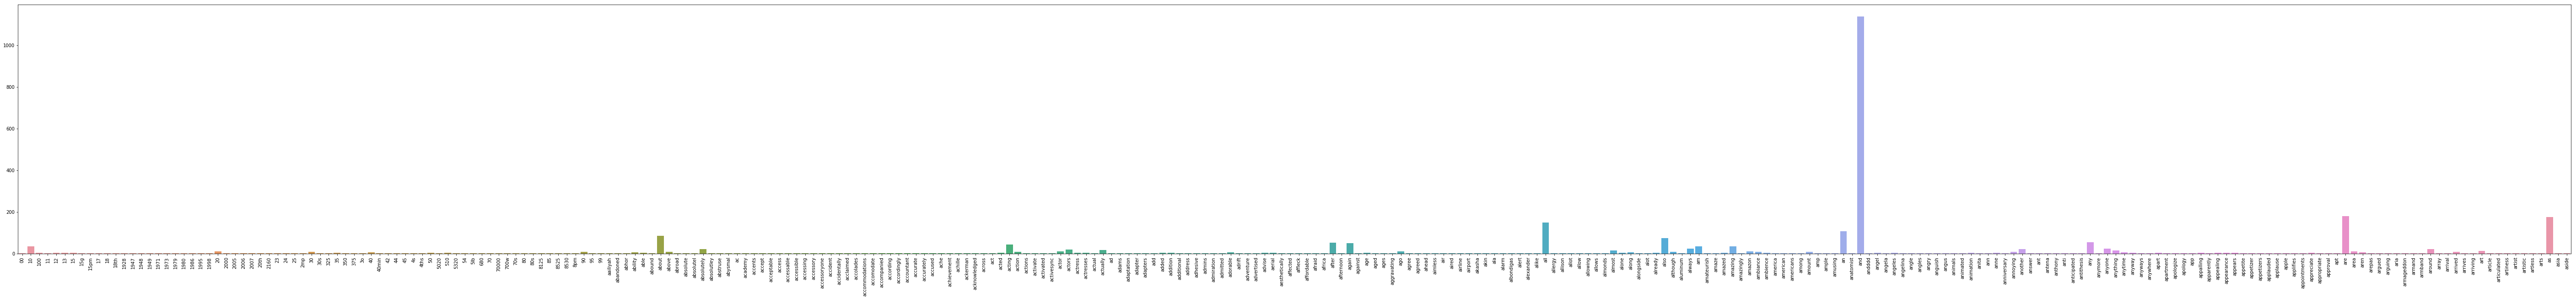

In [51]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [53]:
# Answer here
import plotly.plotly as py
import plotly
import helpers.text_analysis as ta
plotly.tools.set_credentials_file(username='wenwei', api_key='gly83g0VPxJZu3BtFa94')

py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))


/Users/wenwei/.virtualenvs/DL/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [54]:
av = term_frequencies.mean()
std = np.std(term_frequencies)
feature_names = count_vect.get_feature_names()
term_frequencies_abmean=[]
new_feature = []
# Plot the top 5% terms
for i in range(len(term_frequencies)):
    if term_frequencies[i] > av + 2*std:
        term_frequencies_abmean.append(term_frequencies[i])
        new_feature.append(feature_names[i])
        
py.iplot(ta.plot_word_frequency([new_feature, term_frequencies_abmean], "Term Frequency Distribution"))

/Users/wenwei/.virtualenvs/DL/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [55]:
mix = [(new_feature[i], term_frequencies_abmean[i]) for i in range(len(term_frequencies_abmean))]
sorted_names = [ new_feature for f, name in sorted(mix, reverse=True)]
sorted_feq = sorted(term_frequencies_abmean, reverse=True)

py.iplot(ta.plot_word_frequency([sorted_names[0], sorted_feq], "Term Frequency Distribution(Long tail)"))

/Users/wenwei/.virtualenvs/DL/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

In [ ]:
# plot log
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.score)
mlb.classes_

In [ ]:
X['bin_category'] = mlb.transform(X['score']).tolist()
X[0:9]

# Text visualization

In [56]:
# Make the feature name and frequency into a dataframe
df_names_dict = {"feature_names": feature_names,
                "frequencies": term_frequencies}
df_names = pd.DataFrame(df_names_dict)
df_names

,feature_names,frequencies
0,00,1
1,10,34
2,100,3
3,11,2
4,12,4
5,13,3
6,15,3
7,15g,1
8,15pm,1
9,17,2


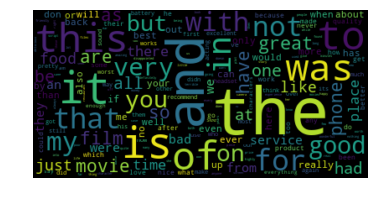

In [57]:
d = {}
for a, x in df_names.values:
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Generate TF-IDF features

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
X_feature = vect.fit_transform(X.text)
vect.get_feature_names()[-50:]

['worthwhile',
 'worthy',
 'would',
 'wouldn',
 'wouldnt',
 'wound',
 'woven',
 'wow',
 'wrap',
 'wrapped',
 'write',
 'writer',
 'writers',
 'writing',
 'written',
 'wrong',
 'wrongly',
 'wrote',
 'ya',
 'yama',
 'yardley',
 'yawn',
 'yay',
 'yeah',
 'year',
 'years',
 'yell',
 'yellow',
 'yellowtail',
 'yelpers',
 'yelps',
 'yes',
 'yet',
 'you',
 'young',
 'younger',
 'your',
 'yourself',
 'youthful',
 'youtube',
 'yucky',
 'yukon',
 'yum',
 'yummy',
 'yun',
 'z500a',
 'zero',
 'zillion',
 'zombie',
 'zombiez']

    Print the selected features name.
    

In [59]:
# Random sample 2 sentences
X_random = X.sample(n=2).text
X_random

425    Almost everyone involved must be return to sch...
130    There was NO chemistry between Ben Affleck and...
Name: text, dtype: object

# Cosine similarity
    
    Calculate similarity with random selected samples.

In [60]:
from sklearn.metrics.pairwise import cosine_similarity

vect_tfidf = TfidfVectorizer()
X_tfidf = vect_tfidf.fit_transform(X_random)
vect_tfidf.get_feature_names()[:]
a = X_tfidf[:][:].toarray()
cos_sim = cosine_similarity(a[0:1][:],a[1:2][:])
print (cos_sim)

[[0.068143]]


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
sim_arr = []
for i in range(100):
    vect_tfidf = TfidfVectorizer()
    random_text = data.sample(n=2).text
    X_tfidf = vect_tfidf.fit_transform(random_text)
    vect_tfidf.get_feature_names()[:]
    a = X_tfidf[:][:].toarray()
    sim_arr.append(cosine_similarity(a[0:1][:].tolist(),a[1:2][:].tolist()))
    print('Sentence 1: %s\nSentence 2: %s\nSimilarity: %f \n' % (random_text.iloc[0],random_text.iloc[1],sim_arr[-1]))


Sentence 1: I know that Jim O'Connor was very energetic and that nobody could be as much as him, but George was well dull.
Sentence 2: Personally, I think it shows that people should learn to find a compromise them self without involving other people into issue.
Similarity: 0.044695 

Sentence 1: (It wasn't busy either) Also, the building was FREEZING cold.
Sentence 2: The very idea of it was lame - take a minor character from a mediocre PG-13 film, and make a complete non-sequel while changing its tone to a PG-rated family movie.
Similarity: 0.095773 

Sentence 1: But when I check voice mail at night, the keypad backlight turns off a few seconds into the first message, and then I'm lost.
Sentence 2: Gets the job done.
Similarity: 0.117924 

Sentence 1: for 40 bucks a head, i really expect better food.
Sentence 2: The visual effects were AWFUL.
Similarity: 0.000000 

Sentence 1: My colleague & I now get great reception.A little expensive, but performance is great.
Sentence 2: I ordered


Sentence 1: Unfortunately, it was not good.
Sentence 2: :) Anyway, the plot flowed smoothly and the male-bonding scenes were a hoot.
Similarity: 0.000000 

Sentence 1: Not good when wearing a hat or sunglasses.
Sentence 2: And I just love the colors!
Similarity: 0.000000 

Sentence 1: I guess that nobody at the network that aired this dribble watched it before putting it on.
Sentence 2: And the sound quality is great.
Similarity: 0.048848 

Sentence 1: I can take a little bad service but the food sucks.
Sentence 2: Never had anything to complain about here.
Similarity: 0.000000 

Sentence 1: I guess maybe we went on an off night but it was disgraceful.
Sentence 2: this was a different cut than the piece the other day but still wonderful and tender s well as well flavored.
Similarity: 0.065030 

Sentence 1: This allows the possibility of double booking for the same date and time after the first.
Sentence 2: But then they came back cold.
Similarity: 0.000000 

Sentence 1: I love Lane, b

In [62]:
from sklearn.model_selection import train_test_split

# Split the data into training set and valid set
train_X, test_X, score_X, ans_X= train_test_split(X_feature, X.score, test_size=0.3)

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

vect_tfidf = TfidfVectorizer()
GNB.fit(train_X.toarray(), pd.to_numeric(score_X,downcast= 'float'))

pred = GNB.predict(test_X.toarray())
count = 0
i = 0
for item in ans_X:
    if int(pred[i]) == int(item):
        count += 1
    i+=1
print('accuracy: %f' %(count/len(pred)))

accuracy: 0.670787


     I got 67% accuracy on validation data.